# Project 

# Image_Classification

# **Name:- Gaurav Suryavanshi**

# Fashion MNIST datasets
In this assignment we use the [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset which contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels), as seen here:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

Fashion MNIST is intended as a drop-in replacement for the classic [MNIST](http://yann.lecun.com/exdb/mnist/) dataset. The MNIST dataset contains images of handwritten digits (0, 1, 2, etc.) in a format identical to that of the articles of clothing you'll use here.



Here, 60,000 images are used to train the network and 10,000 images to evaluate how accurately the network learned to classify images. You can access the Fashion MNIST directly from TensorFlow. Import and load the Fashion MNIST data directly from TensorFlow:


In [85]:
# load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [113]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.models import Sequential

from keras.datasets import fashion_mnist
from keras.layers import Dense, Flatten
from keras.utils import to_categorical

In [114]:
# load the dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
# x= images
# y= labels

Loading the dataset returns four NumPy arrays:

* The `train_images` and `train_labels` arrays are the *training set*—the data the model uses to learn.
* The model is tested against the *test set*, the `test_images`, and `test_labels` arrays.

The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The *labels* are an array of integers, ranging from 0 to 9. These correspond to the *class* of clothing the image represents:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Each image is mapped to a single label. Since the *class names* are not included with the dataset, store them here to use later when plotting the images:

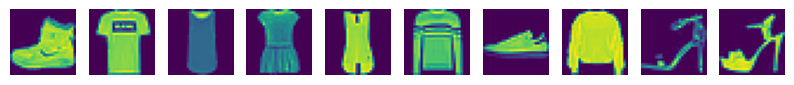

Labels for each of the above images:  [9 0 0 3 0 2 7 2 5 5]


In [115]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 1))  # Set the figure size
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(train_images[i])  # Plot grayscale image
    plt.axis('off')  # Turn off axis
plt.show()

# Print the corresponding labels
print("Labels for each of the above images: ", train_labels[:10])


In [116]:
n=5

In [117]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

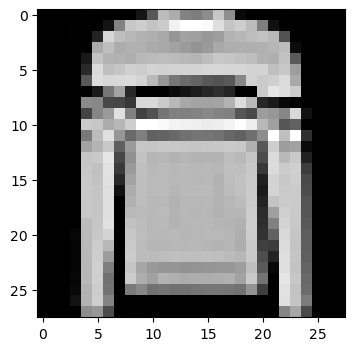

Label: 2


In [118]:
# Plot the image
plt.figure(figsize=[4, 4])
plt.imshow(train_images[n].reshape(28, 28), cmap='gray')  # Reshape the image to 28x28
plt.show()
print("Label:", train_labels[n])
# if turn off axis
# plt.axis('off') 

In [119]:
n=9

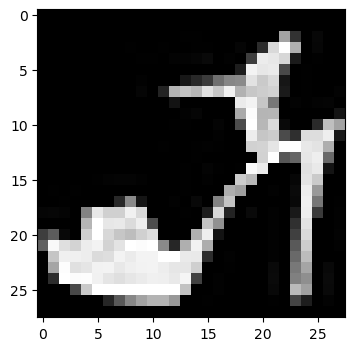

Label: 5


In [120]:
plt.figure(figsize=[4, 4])
plt.imshow(train_images[n].reshape(28, 28), cmap='gray')  # Reshape the image to 28x28
plt.show()
print("Label:", train_labels[n])

# Data Pre-processing

In [121]:
# Assuming train_images and test_images are NumPy arrays
# reshaping images data (n,28,28)= (n, 784)

# Reshape train_images
train_images = train_images.reshape(train_images.shape[0], -1)

# Reshape test_images
test_images = test_images.reshape(test_images.shape[0], -1)

In [122]:
# conversely the data into categorical ( one-Hot codeing)
train_labels = to_categorical(train_labels)
test_labels= to_categorical(test_labels)

In [123]:
# print the data
print( train_images.shape , test_images.shape , train_labels.shape , test_labels.shape)

(60000, 784) (10000, 784) (60000, 10) (10000, 10)


# Basics of NN model 
 NLP model without any alteration

In [97]:
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras import optimizers

In [98]:
# implimentation of NN
# create a model
model= Sequential()

In [99]:
# Add the first dense layer with num_units_layer1 units and sigmoid activation
# first 4 is linear and last one is non linear layer

# layer 1
model.add(Dense(50, input_shape = (784,)))
model.add(Activation('sigmoid'))

# layer 2
model.add(Dense(50))              # Dense = no. of neurons
model.add(Activation('sigmoid'))  # use random initilizer here

# layer 3
model.add(Dense(50))
model.add(Activation('sigmoid'))

# layer 4
model.add(Dense(50))
model.add(Activation('sigmoid'))

# layer 5 (non - linear)- labels
model.add(Dense(10))
model.add(Activation('softmax'))

In [100]:
sgd= optimizers.SGD( lr = 0.01)  # sgd= stochastic gradient descent 
model.compile(optimizer=sgd , loss= 'categorical_crossentropy', metrics= ['accuracy'])

In [104]:
print(train_images.shape,train_labels.shape)

(60000, 784) (60000, 10)


In [101]:
# fit the model
history = model.fit(train_images, train_labels,batch_size=200, epochs=100,verbose=1)


Epoch 1/100
300/300 [==============================] - 2s 5ms/step - loss: 2.3392 - accuracy: 0.1091
Epoch 2/100
300/300 [==============================] - 1s 4ms/step - loss: 2.3000 - accuracy: 0.1234
Epoch 3/100
300/300 [==============================] - 1s 4ms/step - loss: 2.2982 - accuracy: 0.1402
Epoch 4/100
300/300 [==============================] - 1s 4ms/step - loss: 2.2964 - accuracy: 0.1863
Epoch 5/100
300/300 [==============================] - 1s 4ms/step - loss: 2.2947 - accuracy: 0.1866
Epoch 6/100
300/300 [==============================] - 1s 4ms/step - loss: 2.2931 - accuracy: 0.2519
Epoch 7/100
300/300 [==============================] - 1s 4ms/step - loss: 2.2913 - accuracy: 0.2421
Epoch 8/100
300/300 [==============================] - 1s 4ms/step - loss: 2.2892 - accuracy: 0.2991
Epoch 9/100
300/300 [==============================] - 1s 4ms/step - loss: 2.2869 - accuracy: 0.2914
Epoch 10/100
300/300 [==============================] - 1s 4ms/step - loss: 2.2844 - accura

In [137]:
result = model.evaluate(test_images, test_labels,verbose=2)

313/313 - 1s - loss: nan - accuracy: 0.1000 - 821ms/epoch - 3ms/step


In [107]:
# print the testing accuracy
print('test Accuracy :', result[1])

test Accuracy : 0.7721999883651733


# Weight Initializatin
changing the weight initializatio scheme can significantly imporve traing of the model by preventing vanishing gradient problem up to some degree

Ref :- https://kera.lo/inotializers/

In [131]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import optimizers


# from now on, create a function to generate model

# normalize the weitht with the help of optimizers

def nlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape=(784,), kernel_initializer='he_normal')) # use he_normal initilizer
    model.add(Activation('sigmoid'))

    # layer 2
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(Activation('sigmoid'))

    # layer 3
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(Activation('sigmoid'))

    # layer 4
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(Activation('sigmoid'))

    # Output layer (softmax activation for multi-class classification)
    model.add(Dense(10, kernel_initializer='he_normal'))  # Assuming 10 output classes
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(learning_rate=0.01)
    model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model



In [136]:
model = nlp_model()
history = model.fit(train_images.reshape(-1, 784), train_labels, batch_size=200, epochs=100, verbose=1)


Epoch 1/100
300/300 [==============================] - 2s 4ms/step - loss: nan - accuracy: 0.0998
Epoch 2/100
300/300 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.1000
Epoch 3/100
300/300 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.1000
Epoch 4/100
300/300 [==============================] - 2s 5ms/step - loss: nan - accuracy: 0.1000
Epoch 5/100
300/300 [==============================] - 2s 5ms/step - loss: nan - accuracy: 0.1000
Epoch 6/100
300/300 [==============================] - 2s 6ms/step - loss: nan - accuracy: 0.1000
Epoch 7/100
300/300 [==============================] - 1s 5ms/step - loss: nan - accuracy: 0.1000
Epoch 8/100
300/300 [==============================] - 1s 5ms/step - loss: nan - accuracy: 0.1000
Epoch 9/100
300/300 [==============================] - 2s 5ms/step - loss: nan - accuracy: 0.1000
Epoch 10/100
300/300 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.1000
Epoch 11/100
300/30

In [135]:
result = model.evaluate(test_images, test_labels,verbose=2)

313/313 - 1s - loss: nan - accuracy: 0.1000 - 738ms/epoch - 2ms/step


In [139]:
# print the testing accuracy
print('test Accuracy :', result[1])

test Accuracy : 0.10000000149011612


# 2. Nonlinearity ( Activation Function)
- sigmoid functin suffer from gradient vanishing problem, making training slower
- There are cholces apart from sigmoid and tanh, try many of them
- 'relu'(rectified linear unit) is one of the most opular ones

In [133]:
def nlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape=(784,))) 
    model.add(('relu'))

    # layer 2
    model.add(Dense(50))
    model.add(Activation('relu'))

    # layer 3
    model.add(Dense(50))
    model.add(Activation('relu'))

    # layer 4
    model.add(Dense(50))
    model.add(Activation('relu'))

    # Output layer (softmax activation for multi-class classification)
    model.add(Dense(10))  # Assuming 10 output classes
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(learning_rate=0.01)
    model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model


In [134]:
model = nlp_model()
history = model.fit(train_images.reshape(-1, 784), train_labels, batch_size=200, epochs=100, verbose=1)


Epoch 1/100
300/300 [==============================] - 2s 5ms/step - loss: nan - accuracy: 0.1003
Epoch 2/100
300/300 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.1000
Epoch 3/100
300/300 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.1000
Epoch 4/100
300/300 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.1000
Epoch 5/100
300/300 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.1000
Epoch 6/100
300/300 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.1000
Epoch 7/100
300/300 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.1000
Epoch 8/100
300/300 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.1000
Epoch 9/100
300/300 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.1000
Epoch 10/100
300/300 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.1000
Epoch 11/100
300/30

In [138]:
result = model.evaluate(test_images, test_labels,verbose=2)

313/313 - 1s - loss: nan - accuracy: 0.1000 - 685ms/epoch - 2ms/step


In [140]:
# print the testing accuracy
print('test Accuracy :', result[1])

test Accuracy : 0.10000000149011612


# Batch Normalization
- Batch Narmalization one of the methods to revent the internal covariance shift problem, has proven to be hightly effective
- normalize each mini-batch before nonlinearity

In [143]:
from keras.layers import BatchNormalization , Dropout

Batch normalization laer is usually inserted afther dense/convolution and before nonlinearity's 

In [146]:
def nlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape=(784,))) 
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    # layer 2
    model.add(Dense(50)) 
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    # layer 3
    model.add(Dense(50)) 
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    # layer 4
    model.add(Dense(50)) 
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    # Output layer (softmax activation for multi-class classification)
    model.add(Dense(10))  # Assuming 10 output classes
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(learning_rate=0.01)
    model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model


In [147]:
model = nlp_model()
history = model.fit(train_images, train_labels,  epochs=20, verbose=1)


Epoch 1/20
1875/1875 [==============================] - 9s 4ms/step - loss: 0.7224 - accuracy: 0.7694
Epoch 2/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4784 - accuracy: 0.8335
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4295 - accuracy: 0.8496
Epoch 4/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4028 - accuracy: 0.8581
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3804 - accuracy: 0.8647
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3651 - accuracy: 0.8692
Epoch 7/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3512 - accuracy: 0.8745
Epoch 8/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3421 - accuracy: 0.8760
Epoch 9/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3283 - accuracy: 0.8813
Epoch 10/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.321

In [148]:
result = model.evaluate(test_images, test_labels,verbose=2)

313/313 - 1s - loss: 0.3439 - accuracy: 0.8770 - 1s/epoch - 3ms/step


In [149]:
# print the testing accuracy
print('test Accuracy :', result[1])

test Accuracy : 0.8769999742507935


# Dropout method

In [157]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Activation, Dropout
from tensorflow.keras import optimizers

def nlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape=(784,), kernel_initializer='he_normal')) 
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))                  # 20% dropout

    # layer 2
    model.add(Dense(50, kernel_initializer='he_normal')) 
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))

    # layer 3
    model.add(Dense(50, kernel_initializer='he_normal')) 
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))

    # layer 4
    model.add(Dense(50, kernel_initializer='he_normal')) 
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))

    # Output layer (softmax activation for multi-class classification)
    model.add(Dense(10, kernel_initializer='he_normal'))  # Assuming 10 output classes
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(learning_rate=0.01)
    model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

model = nlp_model()
history = model.fit(train_images, train_labels, epochs=10, verbose=1)


Epoch 1/10
1875/1875 [==============================] - 11s 4ms/step - loss: 1.2378 - accuracy: 0.5794
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.8143 - accuracy: 0.7225
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.7211 - accuracy: 0.7567
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.6730 - accuracy: 0.7742
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.6436 - accuracy: 0.7833
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.6147 - accuracy: 0.7947
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5984 - accuracy: 0.7974
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5828 - accuracy: 0.8056
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5692 - accuracy: 0.8101
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5

In [158]:
result = model.evaluate(test_images, test_labels,verbose=2)

313/313 - 1s - loss: 0.4215 - accuracy: 0.8454 - 1s/epoch - 4ms/step


In [159]:
# print the testing accuracy
print('test Accuracy :', result[1])

test Accuracy : 0.8453999757766724
